##### Teste Técnico Bagy
Neste documento está contida a análise do dataset fornecido pela Bagy. O objetivo desta análise é responder as seguintes perguntas:
1. Quais as 10 lojas com maior faturamento em pedidos? Sumarize os dados dessa loja
apresentando os seguintes campos:
    - StoreId
    - Volume total de itens vendidos
    - Valor total vendido
2. Qual ticket médio mensal dos pedidos apresentados? Qual o volume médio mensal de
vendas (todas as lojas)?
3. Existe alguma correlação entre o país e o volume de itens vendidos? Qual o item mais
vendido e o menos vendido no país com maior volume de vendas?
4. Extra - A partir dos números apresentados e o seu conhecimento prévio, apresente
ideais/estratégias que podem ser implementadas para auxiliar nossos lojistas a aumentarem
o volume de vendas?

##### Carregando o dataset e criando as colunas necessárias

In [207]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# para ler o arquivo corretamente é preciso levar em conta que ele está separado por ';'
# e que o encoding adequado não é utf-8 como de costume
df = pd.read_csv('teste_dados_ecommerce.csv', sep=';', encoding='latin-1')

# criando uma coluna com o valor total de cada pedido ao multiplicar a quantidade de unidades
# pelo valor de cada uma
df['Total'] = df['Quantity'] * df['UnitPrice']

# convertendo a coluna de data de string para TIMESTAMP
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

##### Pergunta 1

In [208]:
# separando o dataset por id das lojas e calculando a soma das colunas 'Quantity' e 'Total'
lojas_total = df.groupby(by=['StoreId'])[['Quantity', 'Total']].sum()

# ordenando os valores e selecionando as top 10 lojas
lojas_total.sort_values(by=['Total'], ascending=False).head(10)

,Quantity,Total
StoreId,,
17,337514,659675.740
4,350583,607875.170
13,266709,525823.970
5,251249,505066.590
15,268690,504586.530
16,259878,501436.810
9,271067,494288.550
2,241355,493832.540
1,236687,488837.071


Como pode ser observado, na tabela acima temos a ID da cada loja seguido pelo número total de pedidos e o faturamento total. <br>
Nessa tabela estao presentes apenas as _**10 lojas com maior faturamento**_, ranquedas por faturamento total. <br>
**_A loja com maior faturamento foi a 17_**, que embora não tenha sido a que mais vendeu foi a que mais faturou.

<AxesSubplot:xlabel='StoreId', ylabel='Total'>

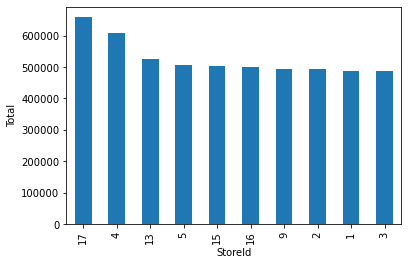

In [209]:
# novamente ordenando os valores e selecionando as top 10 lojas, mas gerando um grafico de barras
lojas_total.sort_values(by=['Total'], ascending=False)['Total'].head(10).plot(kind='bar', ylabel='Total')

##### Pergunta 2

In [210]:
# agrupando os dados por ano e mês
dates = df.set_index('InvoiceDate')

# gerando o total de pedidos e faturamento por mês
ticket_medio = dates.groupby(by=[dates.index.year, dates.index.month])[['Quantity', 'Total']].sum()

# criando uma coluna com o valor do ticket médio mensal
ticket_medio['Average Ticket'] = ticket_medio['Total'] / ticket_medio['Quantity']
ticket_medio

Quantity        Total  Average Ticket
InvoiceDate InvoiceDate                                       
2010        12             342228   748957.020        2.188474
2011        1              308966   560000.260        1.812498
            2              277989   498062.650        1.791663
            3              351872   683267.080        1.941806
            4              289098   493207.121        1.706021
            5              380391   723333.510        1.901553
            6              341623   691123.120        2.023058
            7              391116   681300.111        1.741939
            8              406199   682680.510        1.680655
            9              549817  1019687.622        1.854595
            10             570532  1070704.670        1.876678
            11             740286  1461756.250        1.974583
            12             226333   433668.010        1.916062

Na tabela acima, temos a quantidade total de pedidos para cada mês do ano e o faturamento total mensal.<br>
Os dados disponíveis compreendem o período entre dezembro de 2010 e dezembro de 2011.<br>
Com esses valores foi possível calcular o **_ticket médio de cada mês_**, com os valores variando entre 1,7 e 2,1<br>
dependendo do mês.

In [211]:
# agrupando os dados por ano e mês
qtd_media_vendas_mensais = dates.groupby(by=[dates.index.year, dates.index.month])

# separando a coluna de quantidade, somando o total para cada mês e gerando a média
qtd_media_vendas_mensais['Quantity'].sum().mean()

398188.46153846156

In [212]:
# agrupando os dados por ano e mês
total_media_vendas_mensais = dates.groupby(by=[dates.index.year, dates.index.month])

# separando a coluna do total, somando o total para cada mês e gerando a média
total_media_vendas_mensais['Total'].sum().mean()

749826.7641538461

Com base nisso, podemos ver que o **_volume médio de vendas mensal_** (considerando todas as lojas) <br>
foi de 398.188 unidades em quantidade e $749.826,76 em faturamento.<br><br>
Com os mesmos dados podemos criar uma **_análise temporal_** do volume de vendas:

<AxesSubplot:xlabel='Month', ylabel='Total'>

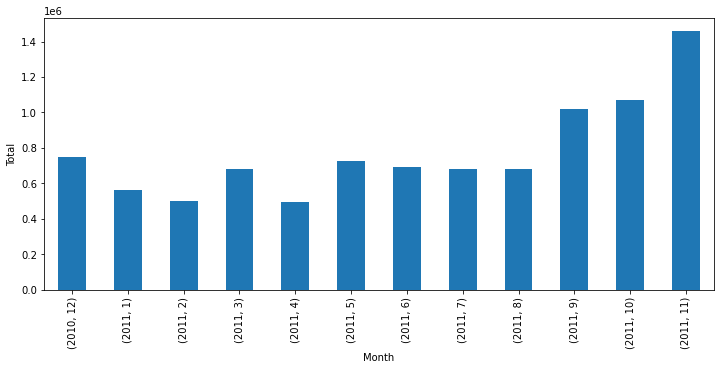

In [213]:
# removendo mês de dezembro de 2011 da análise temporal pois ele está imcompleto e pode criar uma tendência enganosa
filtro = (dates.index.year == 2011) & (dates.index.month == 12)
dates = dates[~filtro]

# agrupando os dados por ano e mês
vendas_mensais = dates.groupby(by=[dates.index.year, dates.index.month])

# criando o plot em barras da coluna de faturamento total
vendas_mensais['Total'].sum().plot(figsize=(12,5), kind='bar', ylabel='Total', xlabel='Month')

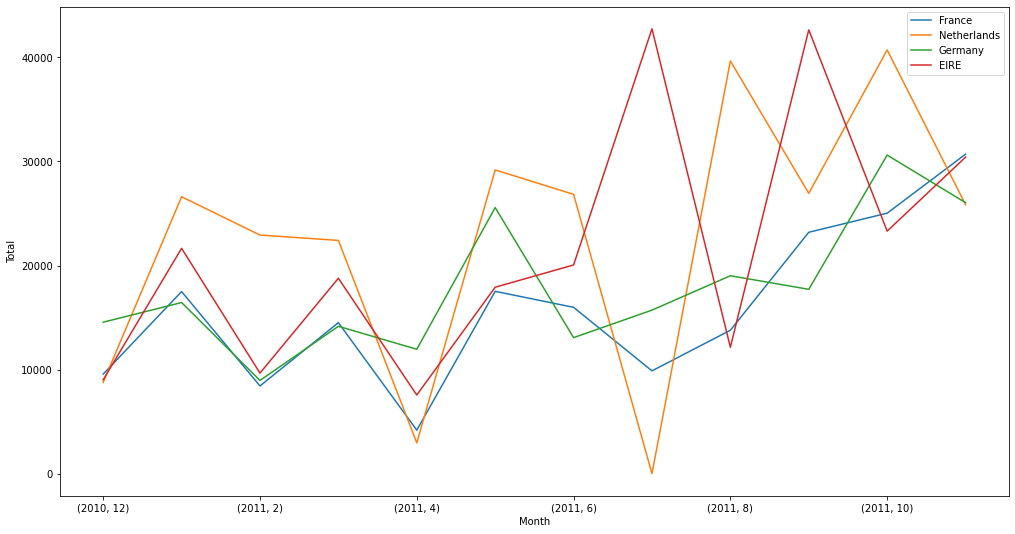

In [214]:
# agrupando o faturametno total por data e país
vendas_mensais_por_pais = dates.groupby(by=['Country', dates.index.year, dates.index.month])['Total'].sum()

# selecionando apenas os 4 maiores vendedores exceto o Reino Unido
paises_emergentes = ['France', 'Netherlands', 'Germany', 'EIRE']

# plotando cada país
for pais in paises_emergentes:
    vendas_mensais_por_pais[pais].plot(figsize=(17,9), ylabel='Total', xlabel='Month', label=pais, legend=True)

Como pode ser observado, o faturamento tem crescido ao longo do período analisado, tanto de maneira geral quanto <br>
nos países emergentes, demontrando um crescimento expressivo das vendas no segundo semestre. Além <br>
disso, é importante salientar o perfil de vendas distinto entre os países que é bem pronunciado no gráfico dos 4 países <br>
emergentes. Entender a natureza desse comportamento, se ele é sazonal ou não etc, é fundamental para um melhor <br>
desempenho nesses mercados. 

##### Pergunta 3

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

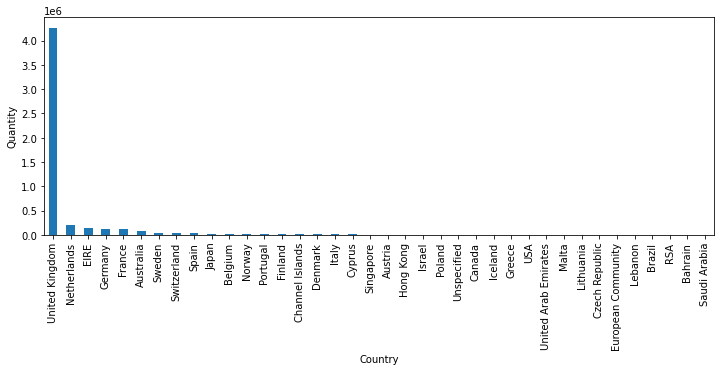

In [215]:
# agrupando dados por paises e somando o total de unidades vendidas em cada um
vendas_por_pais = df.groupby(by=['Country'])['Quantity'].sum()

# ordenando o resultado pelo total de unidades e gerando um grafico de barras
vendas_por_pais.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), ylabel='Quantity')

Fica evidente que a maioria das vendas se concentra no Reino Unido, além de alguns poucos países europeus. <br>
Como a concentração no Reino Unido é muito alta, é possível inferir que esta plataforma de vendas é muito <br>
mais conhecida e acessada lá do que em qualquer outro lugar no mundo. Além disso, fica evidente que o <br>
público em geral é europeu e que se existe interesse em expandir e diversificar esses clientes será preciso focar <br>
bastante no marketing em outros países.

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

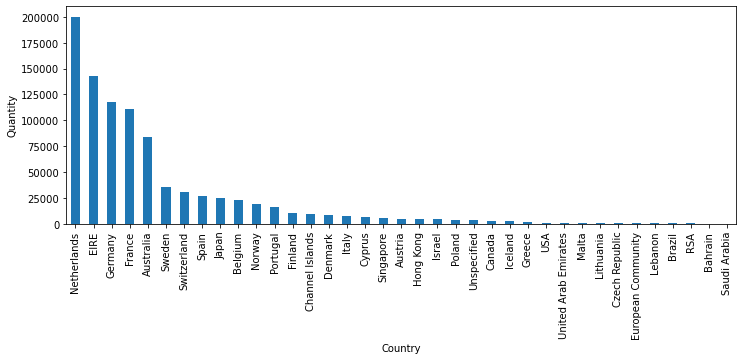

In [216]:
# removendo o reino unido
vendas_sem_uk = df[df['Country'] != 'United Kingdom']

# agrupando dados por paises e somando o total de unidades vendidas em cada um
vendas_sem_uk = vendas_sem_uk.groupby(by=['Country'])['Quantity'].sum()

# ordenando o resultado pelo total de unidades e gerando um grafico de barras
vendas_sem_uk.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), ylabel='Quantity')

Removendo o Reino Unido do gráfico fica mais fácil analisar o volume de vendas dos outros países e visualizar mercados emergentes.<br>
Países como a Holanda e a Alemanha podem vir a ser futuros pontos fortes de vendas.

In [217]:
# agrupando os dados por pais e item vendido, depois somando o total de vendas para cada item
mais_vendido_uk = df.groupby(by=['Country', 'Description'])[['Quantity']].sum()

# selecionando o resultado do reino unido
mais_vendido_uk.loc['United Kingdom'].sort_values('Quantity')

,Quantity
Description,
printing smudges/thrown away,-19200
"Unsaleable, destroyed.",-15644
check,-12030
Printing smudges/thrown away,-9058
Damaged,-7540
...,...
WHITE HANGING HEART T-LIGHT HOLDER,33193
ASSORTED COLOUR BIRD ORNAMENT,33679
POPCORN HOLDER,34365


A tabela acima apresenta o item **_WORLD WAR 2 GLIDERS ASSTD DESIGNS_** como o mais vendido no Reino Unido com um total de **_48.326 unidades_**.<br>
Já o item menos 'vendido' foram itens defeituosos com erros que foram descartados, representado um total negativo de **_-19.200 unidades_**. Se descon-<br>
isderamos itens negativos, o resultado é que existiram vários itens sem nenhuma venda registada.

##### Pergunta 4 - Extra
- Tendo em vista a análise realizada, os lojistas que buscam aumentar suas vendas deveriam focar primariamente no mercado do Reino Unido. Isso significa <br>
investir mais em anúncios neste país e ter sempre em mente os indicadores de mercado para este país, já que é nele onde se concentram a esmagadora <br>
maioria dos consumidores e consequentemente das vendas.

- Direcionar uma parte do investimento para outros mercados pode ser uma opção inteligente para conquistar novos espaços de menor concorrência, mas é <br>
necessário ter cautela, uma vez que primeiro se faz útil entender o motivo da concentração num só país para a partir disso pensar em como diversificar. Um <br>
cenário de aparente pouca concorrência pode ser enganoso, já que podem existir fatores ocultos não compreendidos nos dados em questão, como uma <br>
plataforma concorrente nos outros países que concentra as vendas neste.

- Podemos ir mais fundo e fazer uma análise temporal dos produtos do Reino Unido, observando quais produtos têm crescido nos últimos meses e que tendências existem:

##### Análise Temporal Reino Unido

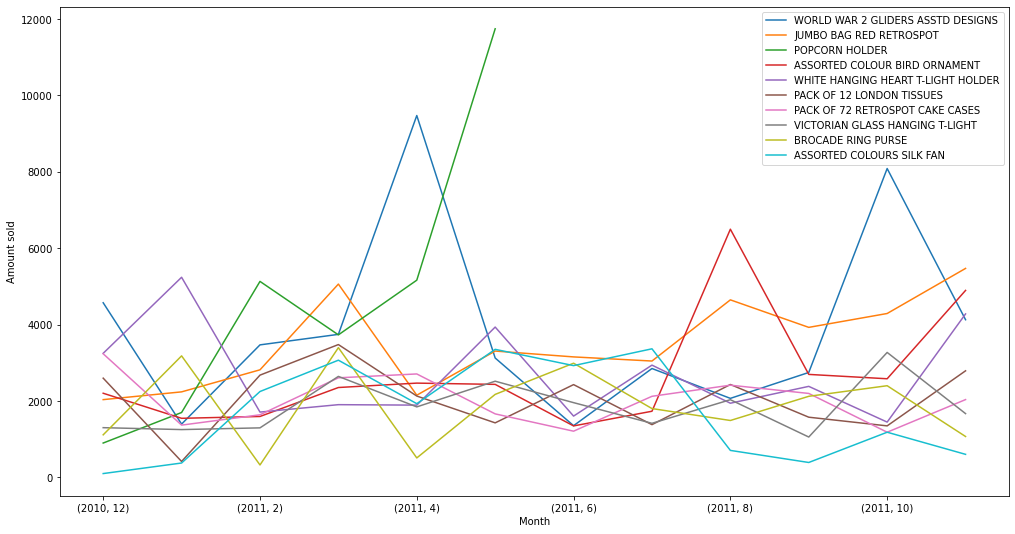

In [218]:
# separando uma lista dos 10 produtos mais vendidos no Reino Unido ao longo do período
top_10_produtos_uk = mais_vendido_uk.loc['United Kingdom'].sort_values('Quantity', ascending=False).head(10).index

# agrupando o dataset por país, produto e data da venda
produtos_por_pais = dates.groupby(by=['Country', 'Description', dates.index.year, dates.index.month])['Quantity'].sum()

# selecionando apenas o Reino Unido
produtos_uk = produtos_por_pais.loc['United Kingdom']

# plotando uma linha para cada produto
for produto in top_10_produtos_uk:
    produtos_uk[produto].plot(figsize=(17,9), ylabel='Amount sold', xlabel='Month', label=produto, legend=True)

No gráfico acima temos os 10 produtos mais vendidos no Reino Unido entre dezembro de 2010 e novembro de 2011. Deste é possível tirar algumas conclusões interessantes:
- Alguns produtos aparentam ter comportamento sazonal, como o 'POP CORN HOLDER' e o 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'. Esse produtos têm picos bem definidos de vendas, podendo ser muito interessantes para alguns lojistas que podem aproveitar melhor cada pico, diminuindo desperdício e prejuízo ao ter melhor mapeado a quantidade e o período esperado.
- Mais ao final do gráfico, vemos que 3 produtos se descatam no crescimento: 'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT' e 'WHITE HANGING HEART T-LIGHT HOLDER'. Saber desta informação poderia guiar o investimento de alguns lojistas, de forma que estes foquem nos produtos em ascensão no momento.